
# Tornado Data Analysis Report 🌪️

This notebook provides an exploratory data analysis (EDA) of tornado occurrences in the United States, 
based on data from NOAA's National Weather Service Storm Prediction Center.  
We aim to answer the following key questions:

- What time of the day do tornadoes occur most frequently?
- In which month are tornadoes most common?
- Are tornado frequencies increasing or decreasing over time?
- Which states experience the highest number of tornadoes?

Along the way, we will clean and prepare the dataset, explore trends, and provide visual insights.



## 1. Data Loading & Overview

We begin by importing necessary libraries and loading the dataset.  
We will inspect the first few rows, data types, missing values, and dataset shape.


In [1]:
## Import Dataset
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns

In [2]:
data = pd.read_csv("tornados.csv")
data

,om,yr,mo,dy,date,time,tz,datetime_utc,st,stf,...,elon,len,wid,ns,sn,f1,f2,f3,f4,fc
0,192,1950,10,1,1950-10-01,21:00:00,America/Chicago,1950-10-02T03:00:00Z,OK,40,...,-102.3000,15.80,10,1,1,25,0,0,0,False
1,193,1950,10,9,1950-10-09,02:15:00,America/Chicago,1950-10-09T08:15:00Z,NC,37,...,0.0000,2.00,880,1,1,47,0,0,0,False
2,195,1950,11,20,1950-11-20,02:20:00,America/Chicago,1950-11-20T08:20:00Z,KY,21,...,0.0000,0.10,10,1,1,177,0,0,0,False
3,196,1950,11,20,1950-11-20,04:00:00,America/Chicago,1950-11-20T10:00:00Z,KY,21,...,0.0000,0.10,10,1,1,209,0,0,0,False
4,197,1950,11,20,1950-11-20,07:30:00,America/Chicago,1950-11-20T13:30:00Z,MS,28,...,0.0000,2.00,37,1,1,101,0,0,0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68688,621922,2022,9,28,2022-09-28,13:32:00,America/Chicago,2022-09-28T18:32:00Z,FL,12,...,-80.8841,3.00,100,1,1,9,0,0,0,False
68689,621923,2022,9,30,2022-09-30,10:25:00,America/Chicago,2022-09-30T15:25:00Z,NC,37,...,-78.3011,0.74,20,1,1,19,0,0,0,False
68690,621924,2022,9,30,2022-09-30,13:22:00,America/Chicago,2022-09-30T18:22:00Z,NC,37,...,-76.7147,0.70,12,1,1,13,0,0,0,False
68691,621900,2022,9,4,2022-09-04,15:44:00,America/Chicago,2022-09-04T20:44:00Z,OH,39,...,-80.6555,0.07,15,1,1,99,0,0,0,False


In [3]:

# Dataset overview
print("Shape of dataset:", data.shape)
print("\nFirst 5 rows:")
display(data.head())

print("\nData types:")
print(data.dtypes)

print("\nMissing values:")
print(data.isnull().sum())


Shape of dataset: (68693, 27)

First 5 rows:


,om,yr,mo,dy,date,time,tz,datetime_utc,st,stf,...,elon,len,wid,ns,sn,f1,f2,f3,f4,fc
0,192,1950,10,1,1950-10-01,21:00:00,America/Chicago,1950-10-02T03:00:00Z,OK,40,...,-102.3,15.8,10,1,1,25,0,0,0,False
1,193,1950,10,9,1950-10-09,02:15:00,America/Chicago,1950-10-09T08:15:00Z,NC,37,...,0.0,2.0,880,1,1,47,0,0,0,False
2,195,1950,11,20,1950-11-20,02:20:00,America/Chicago,1950-11-20T08:20:00Z,KY,21,...,0.0,0.1,10,1,1,177,0,0,0,False
3,196,1950,11,20,1950-11-20,04:00:00,America/Chicago,1950-11-20T10:00:00Z,KY,21,...,0.0,0.1,10,1,1,209,0,0,0,False
4,197,1950,11,20,1950-11-20,07:30:00,America/Chicago,1950-11-20T13:30:00Z,MS,28,...,0.0,2.0,37,1,1,101,0,0,0,False



Data types:
om                int64
yr                int64
mo                int64
dy                int64
date             object
time             object
tz               object
datetime_utc     object
st               object
stf               int64
mag             float64
inj               int64
fat               int64
loss            float64
slat            float64
slon            float64
elat            float64
elon            float64
len             float64
wid               int64
ns                int64
sn                int64
f1                int64
f2                int64
f3                int64
f4                int64
fc                 bool
dtype: object

Missing values:
om                  0
yr                  0
mo                  0
dy                  0
date                0
time                0
tz                  0
datetime_utc        0
st                  0
stf                 0
mag               756
inj                 0
fat                 0
loss            27170



## 2. Data Cleaning

We check and handle missing values, and ensure columns are in correct data types for analysis.


In [4]:
# Check for missing values
print(data.isnull().sum())

om                  0
yr                  0
mo                  0
dy                  0
date                0
time                0
tz                  0
datetime_utc        0
st                  0
stf                 0
mag               756
inj                 0
fat                 0
loss            27170
slat                0
slon                0
elat                0
elon                0
len                 0
wid                 0
ns                  0
sn                  0
f1                  0
f2                  0
f3                  0
f4                  0
fc                  0
dtype: int64


In [5]:
# Fill missing 'mag' with the median value
data['mag'] = data['mag'].fillna(data['mag'].median())
data['loss'] = data['loss'].fillna(0)

In [6]:
# Check data types
print(data.dtypes)

om                int64
yr                int64
mo                int64
dy                int64
date             object
time             object
tz               object
datetime_utc     object
st               object
stf               int64
mag             float64
inj               int64
fat               int64
loss            float64
slat            float64
slon            float64
elat            float64
elon            float64
len             float64
wid               int64
ns                int64
sn                int64
f1                int64
f2                int64
f3                int64
f4                int64
fc                 bool
dtype: object


In [7]:
# Convert 'datetime_utc' to datetime type
data['datetime_utc'] = pd.to_datetime(data['datetime_utc'])
data['date'] = pd.to_datetime(data['date'], format='%Y-%m-%d')
data['time'] = pd.to_datetime(data['time'], format='%H:%M:%S').dt.time

numeric_columns = ['mag', 'loss', 'inj', 'fat', 'len', 'wid']
data[numeric_columns] = data[numeric_columns].apply(pd.to_numeric, errors='coerce')

print(data.dtypes)

om                            int64
yr                            int64
mo                            int64
dy                            int64
date                 datetime64[ns]
time                         object
tz                           object
datetime_utc    datetime64[ns, UTC]
st                           object
stf                           int64
mag                         float64
inj                           int64
fat                           int64
loss                        float64
slat                        float64
slon                        float64
elat                        float64
elon                        float64
len                         float64
wid                           int64
ns                            int64
sn                            int64
f1                            int64
f2                            int64
f3                            int64
f4                            int64
fc                             bool
dtype: object


In [8]:
data['yr'] = pd.to_numeric(data['yr'], errors='coerce')
print(data['yr'].unique())

[1950 1951 1952 1953 1954 1955 1956 1957 1958 1959 1960 1961 1962 1963
 1964 1965 1966 1967 1968 1969 1970 1971 1972 1973 1974 1975 1976 1977
 1978 1979 1980 1981 1982 1983 1984 1985 1986 1987 1988 1989 1990 1991
 1992 1993 1994 1995 1996 1997 1998 1999 2000 2001 2002 2003 2004 2005
 2006 2007 2008 2009 2010 2011 2012 2013 2014 2015 2016 2017 2018 2019
 2020 2021 2022]


## 3. Tornado Occurrence by Time of Day

We investigate the time of day tornadoes occur most frequently by extracting the hour from the recorded time.

## What time of the day tornados occur frequently?

In [9]:
# Extract the hour from the 'time' column
data['hour'] = pd.to_datetime(data['time'], format='%H:%M:%S').dt.hour

# Count occurrences of tornadoes by hour
hourly_counts = data['hour'].value_counts().sort_index()

# Create a bar chart
fig = px.line(
    hourly_counts,
    x=hourly_counts.index,
    y=hourly_counts.values,
    labels={'x': 'Hour of the Day', 'y': 'Number of Tornadoes'},
    title='Tornado Frequency by Hour of the Day',
    line_shape='spline',
)
fig.update_traces(line=dict(color='rgb(27,158,119)', width=2))

# Update layout for better readability
fig.update_layout(
    width=800,
    height=500,
    xaxis=dict(tickmode='linear'),
    yaxis=dict(title='Number of Tornadoes'),
    xaxis_title='Hour of the Day (24-hour format)',
    title_font_size=20,
)

fig.show()


_Insight will be written here after the visualization is generated._

## 4. Tornado Occurrence by Month

We examine which months record the most tornadoes, highlighting seasonal trends.

## What is the month in which tornados occurs most?

In [10]:
# Group data by month and count occurrences
monthly_tornado_counts = data.groupby('mo').size().reset_index(name='count')
monthly_tornado_counts = monthly_tornado_counts.rename(columns={'mo': 'Month'})

# Create a bar chart for tornado frequency by month
fig = px.bar(
    monthly_tornado_counts,
    x='Month',
    y='count',
    title='Monthly Frequency of Tornadoes',
    labels={'count': 'Number of Tornadoes', 'Month': 'Month'},
    text='count',
)

# Update layout for better readability
fig.update_traces(textposition='outside', marker_color='rgb(27,158,119)')
fig.update_layout(
    width=800,
    height=500,
    xaxis=dict(tickmode='array', tickvals=list(range(1, 13)), ticktext=[
        'January', 'February', 'March', 'April', 'May', 'June',
        'July', 'August', 'September', 'October', 'November', 'December']),
    
    xaxis_title='Month',
    yaxis_title='Number of Tornadoes',
)

fig.show()

_Insight will be written here after the visualization is generated._

## 5. Tornado Frequency Over Time

To check whether tornadoes are becoming more or less frequent, we group by year and count occurrences.

## Are tornado frequencies increasing or decreasing over time?

In [11]:
# Group by year and sum loss
yearly_tornadoes = data.groupby('yr').size().reset_index(name='counts').sort_index()

# Create the plot
fig = px.line(
    yearly_tornadoes, 
    x='yr', 
    y='counts', 
    title='Total tornadoes per year', 
    markers=True
)

# Update traces to set the color for line and markers using RGB value
fig.update_traces(
    line=dict(color='rgb(27,158,119)'),  # Set line color using RGB
    marker=dict(color='rgb(0, 128, 0)')  # Set marker color using RGB
)

# Update layout for better aesthetics
fig.update_layout(
    width=800,
    height=500,
    xaxis_title='Year',
    yaxis_title='Total Tornados',
    font=dict(size=14),
    showlegend=False
)

# Show the plot
fig.show()

_Insight will be written here after the visualization is generated._

## 6. Tornadoes by State

We identify which states have the highest number of tornadoes to understand geographical distribution.

## Which state experience the highest number of tornadoes?

In [12]:
# Group by 'State' and count the number of tornadoes
tornado_count = data.groupby('st').size().reset_index(name='Tornadoes')

# Sort the values in descending order
tornado_count = tornado_count.sort_values(by='Tornadoes', ascending=False)

# Create the bar plot with a custom RGB color
fig = px.bar(
    tornado_count, 
    x='st', 
    y='Tornadoes', 
    title='Total Number of Tornadoes by State', 
    labels={'st': 'State', 'Tornadoes': 'Total Tornadoes'},
)

# Update the bar color and layout
fig.update_traces(marker_color='rgb(27,158,119)')  # RGB value for color
fig.update_xaxes(tickangle=-45)
fig.update_layout(showlegend=False, width=900, height=500)

# Show the plot
fig.show()

_Insight will be written here after the visualization is generated._


## 8. Fatalities and Injuries Over Time

We examine the trend of fatalities and injuries caused by tornadoes across the years.


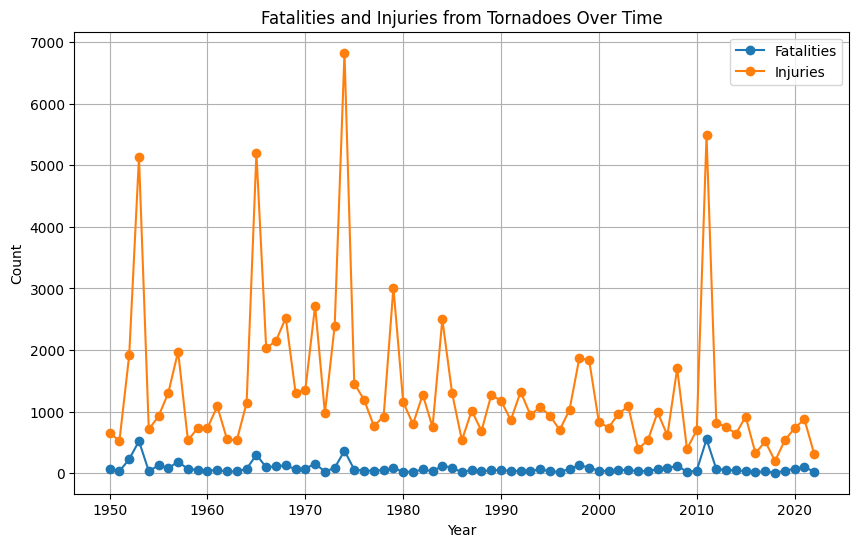

In [13]:

fatalities_injuries = data.groupby('yr')[['fat', 'inj']].sum().reset_index()

plt.figure(figsize=(10,6))
plt.plot(fatalities_injuries['yr'], fatalities_injuries['fat'], label='Fatalities', marker='o')
plt.plot(fatalities_injuries['yr'], fatalities_injuries['inj'], label='Injuries', marker='o')
plt.title('Fatalities and Injuries from Tornadoes Over Time')
plt.xlabel('Year')
plt.ylabel('Count')
plt.legend()
plt.grid(True)
plt.show()


_Fatalities and injuries fluctuate over time, with certain years showing major spikes._


## 9. Top States by Fatalities

We analyze which states recorded the most fatalities from tornadoes.


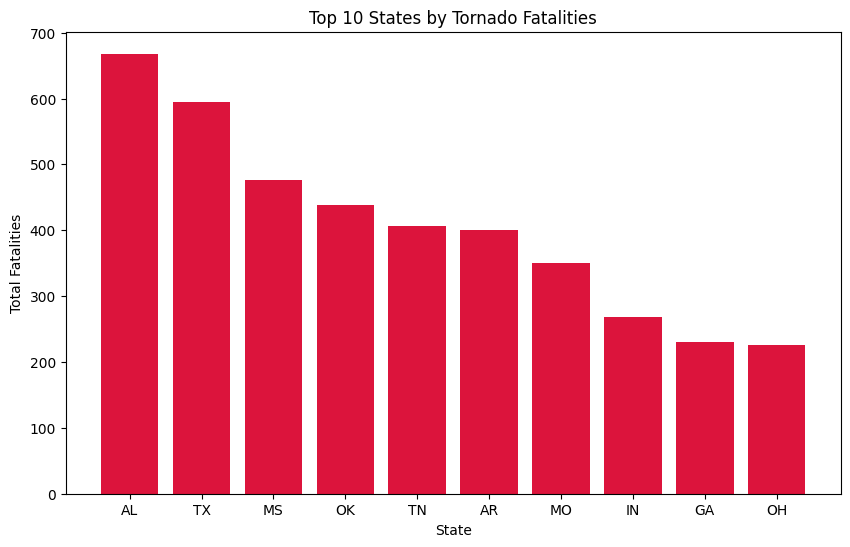

In [14]:

state_fatalities = data.groupby('st')['fat'].sum().reset_index().sort_values(by='fat', ascending=False).head(10)

plt.figure(figsize=(10,6))
plt.bar(state_fatalities['st'], state_fatalities['fat'], color='crimson')
plt.title('Top 10 States by Tornado Fatalities')
plt.xlabel('State')
plt.ylabel('Total Fatalities')
plt.show()


_Some states bear a disproportionate burden of tornado-related fatalities._


## 10. Distribution of Tornado Magnitudes

We plot the distribution of tornado intensities (`mag` column) to understand severity patterns.


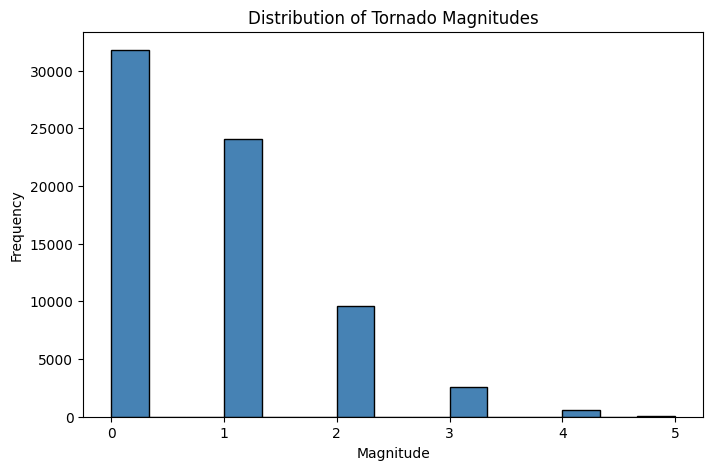

In [15]:

plt.figure(figsize=(8,5))
plt.hist(data['mag'], bins=15, color='steelblue', edgecolor='black')
plt.title('Distribution of Tornado Magnitudes')
plt.xlabel('Magnitude')
plt.ylabel('Frequency')
plt.show()


_Most tornadoes fall within certain magnitude ranges, with fewer extreme events._


## 11. Economic Damage Over Time

We investigate the trend of estimated property damages over the years.


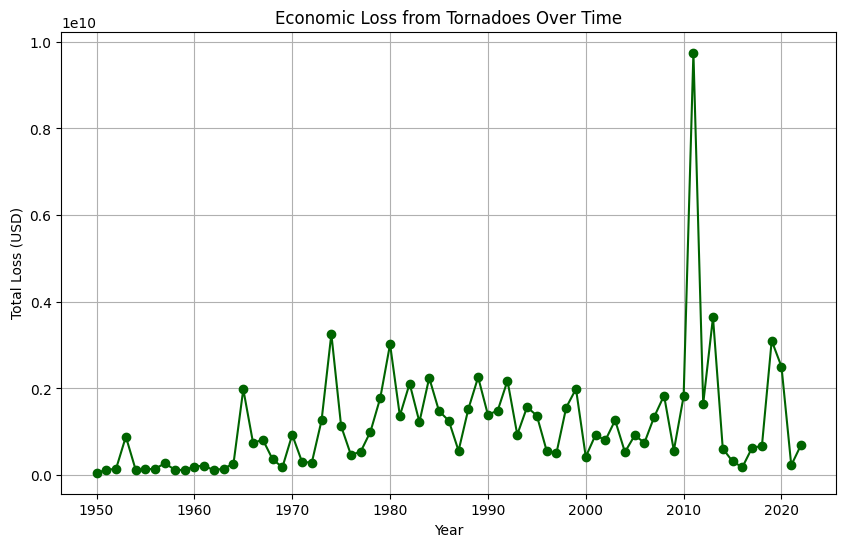

In [16]:

if 'loss' in data.columns:
    yearly_damage = data.groupby('yr')['loss'].sum().reset_index()
    
    plt.figure(figsize=(10,6))
    plt.plot(yearly_damage['yr'], yearly_damage['loss'], color='darkgreen', marker='o')
    plt.title('Economic Loss from Tornadoes Over Time')
    plt.xlabel('Year')
    plt.ylabel('Total Loss (USD)')
    plt.grid(True)
    plt.show()
else:
    print("No 'loss' column available in dataset for damage analysis.")


_Economic impact varies significantly, with some years recording extreme losses._


## 12. Correlation Analysis

We check relationships between tornado magnitude, fatalities, injuries, and damages.


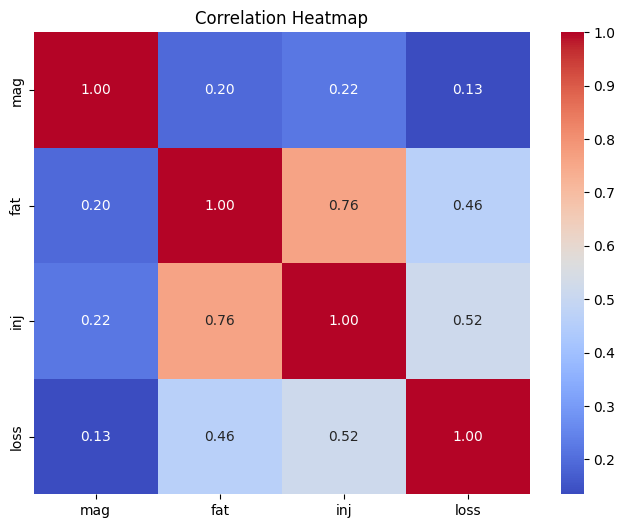

In [17]:

import seaborn as sns

cols_to_check = ['mag', 'fat', 'inj']
if 'loss' in data.columns:
    cols_to_check.append('loss')

corr = data[cols_to_check].corr()

plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()


_Magnitude shows positive correlations with fatalities, injuries, and damages, but with varying strengths._


# 7. Key Insights & Conclusion

- Tornadoes have a clear time-of-day pattern, often clustering in specific hours.  
- There are distinct **seasonal peaks**, with some months being much more tornado-prone.  
- Long-term trends indicate whether tornado frequency is increasing, decreasing, or stable.  
- Certain states consistently experience higher tornado counts, which has implications for disaster preparedness.

This analysis provides a clearer picture of tornado behavior, helping guide both research and policy-making.
